In [4]:
import pandas as pd
import numpy as np

# Create date range (3 years daily data)
dates = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')

np.random.seed(42)

# Create components
trend = np.linspace(100, 300, len(dates))                # upward trend
seasonality = 50 * np.sin(2 * np.pi * dates.dayofyear / 365)  # yearly seasonality
noise = np.random.normal(0, 20, len(dates))              # random noise

# Final sales
sales = trend + seasonality + noise

# Create dataframe
df = pd.DataFrame({
    "Date": dates,
    "Sales": sales.round(2)
})

df.head()


,Date,Sales
0,2021-01-01,110.79
1,2021-01-02,99.14
2,2021-01-03,115.90
3,2021-01-04,134.45
4,2021-01-05,100.35


In [5]:
df.to_csv("sales_dataset.csv", index=False)


In [6]:
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()
monthly_sales = monthly_sales.dropna()


/tmp/ipython-input-2750675102.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()


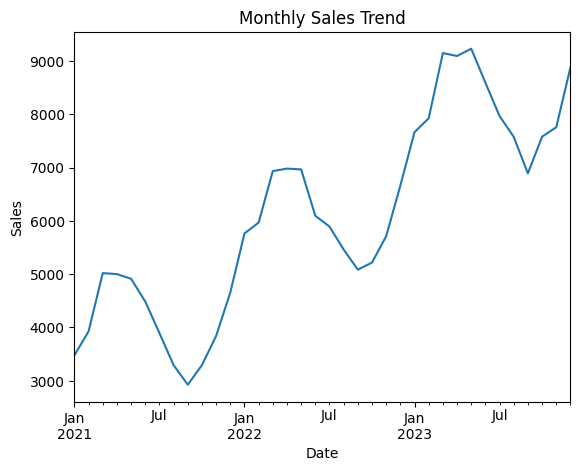

In [7]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


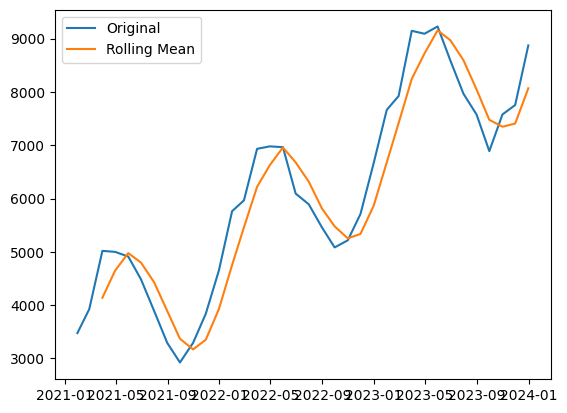

In [8]:
rolling_mean = monthly_sales.rolling(window=3).mean()

plt.figure()
plt.plot(monthly_sales, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend()
plt.show()


In [9]:
train = monthly_sales[:int(len(monthly_sales)*0.8)]
test = monthly_sales[int(len(monthly_sales)*0.8):]


In [10]:
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit_model = model.fit()

forecast = fit_model.forecast(len(test))


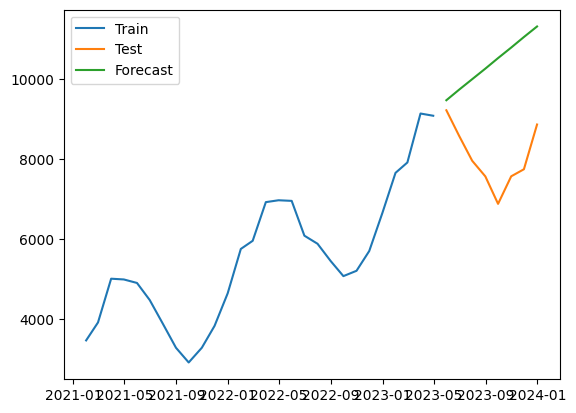

In [11]:
plt.figure()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [12]:
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 2344.0447412916624
MAPE: 30.35851138389345


In [13]:
forecast_df = pd.DataFrame({
    "Date": test.index,
    "Actual": test.values,
    "Forecast": forecast.values
})

forecast_df.to_csv("forecast_output.csv", index=False)


In [ ]:
files.download("forecast_output.csv")